# Import das bibliotecas e imagem utilizada no código
## **Imports das bibliotecas**
* Import das bibliotecas cv2 para tratamento das imagens
* Import da numpy para fazer operações na matriz da imagem
* Import da Requests para fazer a requisição da imagem através de uma url
* Import da matplotlib para exibição das imagens na tela

## **Conversão da matriz para o padrão utilizado no cv2**
É necessário fazer a conversão para RGB pois o cv2 por padrão utiliza BGR


```
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
```



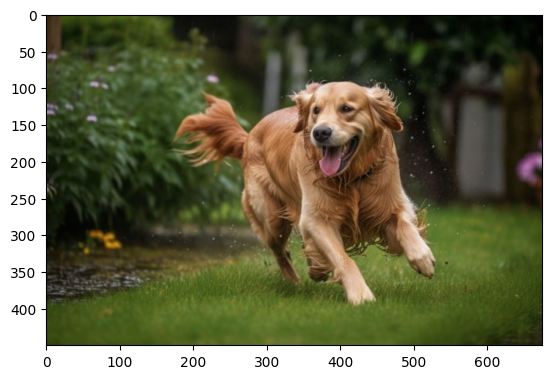

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

url = 'https://midias.correiobraziliense.com.br/_midias/jpg/2024/03/29/675x450/1_golden_retriever-35867546.jpg?20240329205330?20240329205330'

response = requests.get(url)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)

img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Resize da Imagem mantendo as proporções.
* Tamanho Original: 675 x 450
* Novo Tamanho: 337 x 225

(450, 675, 3)

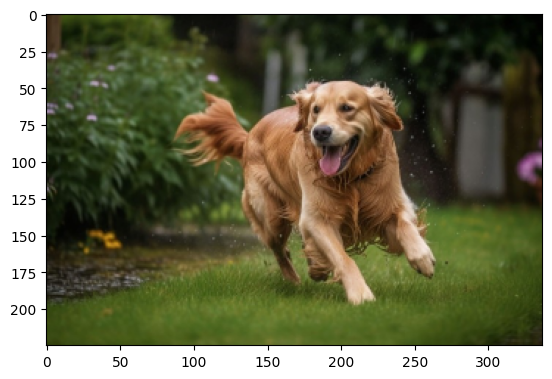

In [ ]:
img_redimensionado = cv2.resize(img, (337, 225))
plt.imshow(img_redimensionado)
img.shape

# Apresentação da imagem para escala de cinza

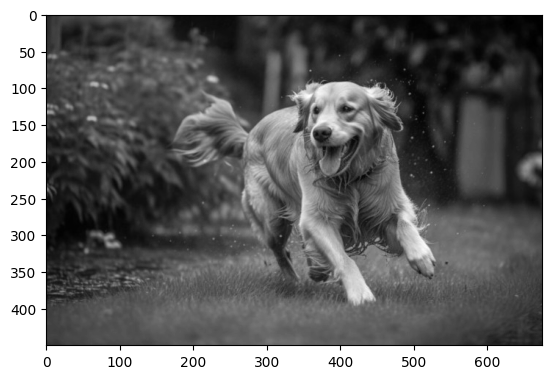

In [ ]:
img_cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_cinza, cmap='gray')

# Apresentação da imagem com filtro sepia

O filtro utilizará a matriz de transformação para ajustar os valores da matriz aplicando assim o filtro Sepia.

O trecho a seguir garante que os valores se mantenham no intervalo de [0, 255] que é o intervalo para os valores RGB.

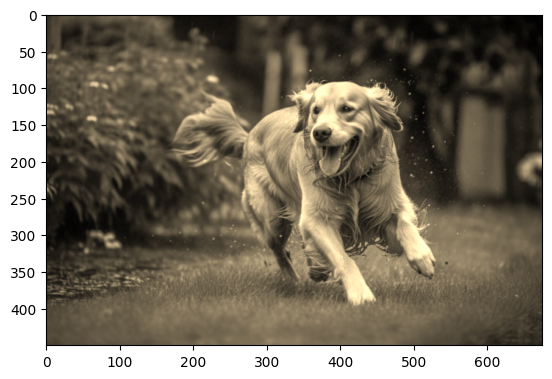

In [ ]:
matriz_transformação = np.array([[0.272, 0.534, 0.131],
                                 [0.349, 0.686, 0.168],
                                 [0.393, 0.769, 0.189]])

img_sepia = cv2.transform(img, matriz_transformação)
img_sepia = cv2.cvtColor(img_sepia, cv2.COLOR_BGR2RGB)

img_sepia = np.clip(img_sepia, 0, 255).astype(np.uint8)

plt.imshow(img_sepia)

# Criação e exibição da imagem SVG animada


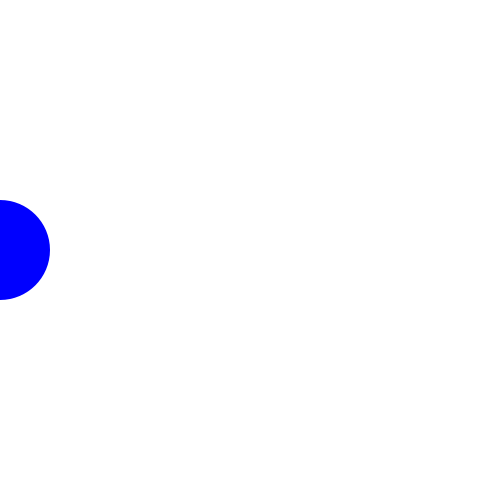

In [ ]:
#!pip install svgwrite

from IPython.display import SVG, display

import svgwrite

svg_img = svgwrite.Drawing('circulo.svg', profile='tiny', size=(500, 500))
svg_img.add(svg_img.rect(insert=(0, 0), size=(500, 500), fill='white'))

circulo = svg_img.circle(center=(0, 250), r=50, fill='blue')
circulo.add(svg_img.animate(attributeName='cx', from_='0%', to='100%', dur='3s', repeatCount='indefinite'))

svg_img.add(circulo)
svg_img.save()

display(SVG('circulo.svg'))